<a href="https://colab.research.google.com/github/AgusteFatu/burayaneyazcaz/blob/main/ml_week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as M
import seaborn as sns
import statsmodels.api as sm

In [138]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:,.2f}'.format

In [54]:
data = pd.read_csv('https://raw.githubusercontent.com/AgusteFatu/burayaneyazcaz/main/data/drug200.csv')

In [24]:
# To show a few observations of data and data length  
display(data.head())
print("\n{} Rows and {} columns.".format(data.shape[0],data.shape[1]))

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.36,DrugY
1,47,M,LOW,HIGH,13.09,drugC
2,47,M,LOW,HIGH,10.11,drugC
3,28,F,NORMAL,HIGH,7.80,drugX
4,61,F,LOW,HIGH,18.04,DrugY



200 Rows and 6 columns.


In [6]:
# Data Summary
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,200.00,44.31,16.54,15.00,31.00,45.00,58.00,74.00
Na_to_K,200.00,16.08,7.22,6.27,10.45,13.94,19.38,38.25


In [ ]:
# Type of variables
data.info()

In [10]:
# .value_counts() To show levels of a factor 
display(pd.DataFrame(data['Sex'].value_counts()).transpose())
print("")
display(pd.DataFrame(data['BP'].value_counts()).transpose())
print("")
display(pd.DataFrame(data['Cholesterol'].value_counts()).transpose())
print("")
display(pd.DataFrame(data['Drug'].value_counts()).transpose())


,M,F
Sex,104,96


,HIGH,LOW,NORMAL
BP,77,64,59


,HIGH,NORMAL
Cholesterol,103,97


,DrugY,drugX,drugA,drugC,drugB
Drug,91,54,23,16,16


In [55]:
# Select feature and target
X = data.drop(['Drug'],axis=1)
y = data[['Drug']]

In [56]:
from sklearn.preprocessing import OneHotEncoder

# Can not use OneHotEncoder for Target 
le = preprocessing.LabelEncoder()
ycoppy = y.copy()
y['Drug'] = le.fit_transform(y['Drug'])

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# Encode column in a different dataframe and then add new dataframe to the old one 
enc_df = pd.DataFrame(enc.fit_transform(X[['Sex']]).toarray())
X = X.join(enc_df)
X.rename(columns={0: 'Sex_F', 1: 'Sex_M'},inplace=True)

enc_df = pd.DataFrame(enc.fit_transform(X[['BP']]).toarray())
X = X.join(enc_df)
X.rename(columns={0: 'BP_HIGH', 1: 'BP_LOW', 2:'NORMAL'},inplace=True)

enc_df = pd.DataFrame(enc.fit_transform(X[['Cholesterol']]).toarray())
X = X.join(enc_df)
X.rename(columns={0: 'Cholesterol_HIGH', 1: 'Cholesterol_NORMAL'},inplace=True)

X = X.drop(['Sex','BP','Cholesterol'],axis=1)

In [ ]:
# Values after encoding 
display(X.head())
display(y.head().transpose())
display(ycoppy.head().transpose())

In [109]:
#Splitting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 266)

# Train and Test data after splitting for target variable
sData = {'Train ' : y_train['Drug'].value_counts(), 'Test ' : y_test['Drug'].value_counts()}
df_2 = pd.DataFrame(sData)
df_2.index = ['DrugY:0' ,'DrugX:4','DrugA:1', 'DrugC:3','DrugB:2']
df_2.transpose()


,DrugY:0,DrugX:4,DrugA:1,DrugC:3,DrugB:2
Train,71,42,19,14,14
Test,20,12,4,2,2


In [ ]:
# To Show % of target value couns
labels = 'DrugY','DrugX','drugA','DrugC','DrugB'
explode = (0.05, 0, 0, 0,0)
 
fig1, ax1 = plt.subplots()
ax1.pie(y_train.value_counts(),explode=explode,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Train set', y=1.05)
plt.show()


In [ ]:
# To Show % of target value couns
labels = 'DrugY','DrugX','drugA','DrugC','DrugB'
explode = (0.05, 0, 0, 0,0)
 
fig1, ax1 = plt.subplots()
ax1.pie(y_test.value_counts(),explode=explode,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Test set', y=1.05)
plt.show()

In [141]:
# Train Model with the same fucntion LogisticRegression with multi_class='multinomial' parameter
model = LogisticRegression(multi_class='multinomial',solver="newton-cg")
model.fit(X_train,y_train)

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

modelEvaluation  = y_train.copy()
modelEvaluation['Predicted_train'] = y_train_predicted
modelEvaluation.columns = ['Actual','Predicted_train']
modelEvaluation.head(9).transpose()

,118,92,161,197,180,158,72,8,41
Actual,1,0,2,4,0,3,4,0,2
Predicted_train,1,0,2,4,0,3,4,0,2


In [159]:
# Accuary: the proportion of the total number of predictions that were correct.
print('From graph above: {}'.format(sum(np.diag(cnf_matrix_train)) / np.sum(cnf_matrix_train)) )
print("Train Accuracy :",M.accuracy_score(y_train, y_train_predicted))
print("Test Accuracy:",M.accuracy_score(y_test, y_test_predicted))

From graph above: 1.0
Train Accuracy : 1.0
Test Accuracy: 0.95


In [199]:
# sensivity: the proportion of actual positive cases which are correctly identified. 
sens_df = pd.DataFrame(M.recall_score(y_train,y_train_predicted,average=None),columns=['Sensivity Train'])
sens_df2 = pd.DataFrame(M.recall_score(y_test,y_test_predicted,average=None),columns=['Sensivity Test'])
sens_df = sens_df.join(sens_df2)
sens_df.index= ['DrugY:0' ,'DrugA:1', 'DrugB:2','DrugC:3','DrugX:4']
sens_df.transpose()

,DrugY:0,DrugA:1,DrugB:2,DrugC:3,DrugX:4
Sensivity Train,1.00,1.00,1.00,1.00,1.00
Sensivity Test,0.95,1.00,0.50,1.00,1.00


In [ ]:
from imblearn.metrics import specificity_score as spec_score
# Specificity the proportion of actucal negative cases which are correctly identified
spec_df = pd.DataFrame(spec_score(y_train, y_train_predicted,average = None),columns=['Specificity Train'])
spec_df2 = pd.DataFrame(spec_score(y_test, y_test_predicted,average = None),columns=['Specificity Test'])
spec_df = spec_df.join(spec_df2)
spec_df.index= ['DrugY:0' ,'DrugA:1', 'DrugB:2','DrugC:3','DrugX:4']
spec_df.transpose()



Text(0.5, 257.44, 'Predicted label')

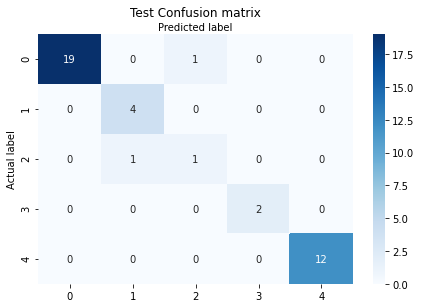

In [156]:
# Confusion Matrix
cnf_matrix_train = metrics.confusion_matrix(y_train, y_train_predicted)
cnf_matrix_test = metrics.confusion_matrix(y_test, y_test_predicted)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap 

#sns.heatmap(pd.DataFrame(cnf_matrix_train), annot=True,cmap="Blues",fmt = "g")
sns.heatmap(pd.DataFrame(cnf_matrix_test), annot=True,cmap="Blues",fmt = "g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Test Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:

logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
result=logit_model.fit()
stats1=result.summary()
print(stats1)


In [ ]:
x = sm.add_constant(X_train, prepend = False)

mnlogit_mod = sm.MNLogit(y_train, x)
mnlogit_fit = mnlogit_mod.fit()

print (mnlogit_fit.summary())

ValueError: ignored

In [ ]:
# .value_counts() To show levels of a factor 
pd.DataFrame(data['Drug'].value_counts()).transpose()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
# Country column
ct = ColumnTransformer([("alper", OneHotEncoder(), [2])], remainder = 'passthrough')
data = ct.fit_transform(data)

pd.DataFrame(data).head(5)

In [ ]:
y.rename(columns={0: 'DrugY',1:'DrugA',2:'DrugB', 3:'DrugC',4:'DrugX'})

In [32]:
5# Selecting Feature and Target
data.info()
print("----------------------------------------------------")
print('Select columns for feature variables (Ex:0-3-4)')
colNum = list(map(int,input().split('-')))
cols = []
for i in colNum:
  cols.append(data.columns.values[i]) 

print('Select target variable')
varY = list(map(int,input().split('-')))

X = pd.DataFrame()
for i in range(len(colNum)):
  X[[cols[i]]] = data[[cols[i]]]
y = data[data.columns.values[varY]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
----------------------------------------------------
Select columns for feature variables (Ex:0-3-4)
0-1-2-3-4
Select target variable
5


In [53]:
data = pd.read_csv('https://raw.githubusercontent.com/AgusteFatu/burayaneyazcaz/main/data/drug200.csv')

X = data.drop(['Drug'],axis=1)
y = data[['Drug']]

# Encoding categorical data with LabelEncoder
le = preprocessing.LabelEncoder()

y['Drug'] = le.fit_transform(y['Drug'])
for feature in cols:
  if X[feature].dtypes == ('O'):
    X[feature] = le.fit_transform(X[feature])
    print('"{}"  data type is Object, "{}" encoded.'.format(feature,feature))

#Splitting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state = 42)


model = LogisticRegression(multi_class='multinomial',solver="newton-cg")
model.fit(X_train,y_train)

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print("Train Accuracy :",metrics.accuracy_score(y_train, y_train_predicted))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_test_predicted))

"Sex"  data type is Object, "Sex" encoded.
"BP"  data type is Object, "BP" encoded.
"Cholesterol"  data type is Object, "Cholesterol" encoded.
Train Accuracy : 0.96875
Test Accuracy: 0.9


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


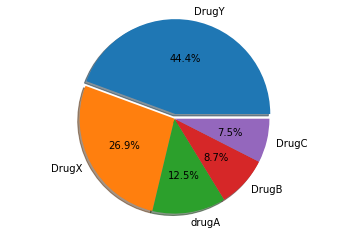

Drug 
DrugY    71
drugX    43
drugA    20
drugB    14
drugC    12
dtype: int64

In [ ]:
labels = 'DrugY','DrugX','drugA','DrugB','DrugC'
explode = (0.05, 0, 0, 0,0)
 
fig1, ax1 = plt.subplots()
ax1.pie(y_train.value_counts(),explode=explode,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
y_train.value_counts()

In [ ]:
X_trainSummary = sm.add_constant(X_train)
logit_model = sm.MNLogit(y_train, X_trainSummary)
result = logit_model.fit()

# Results analysis
print(result.summary())

In [ ]:
list(X_test.index)

In [ ]:
print("Train Sensivity:",metrics.recall_score(y_train,y_train_predicted
,average='micro'))
print("Test Sensivity:",metrics.recall_score(y_test, y_test_predicted,average='weighted'))


In [ ]:
pd.DataFrame(np.exp(model.coef_))

,0,1,2,3,4,5,6,7,8
0,0.97,9.17,0.84,1.20,0.83,0.99,1.22,0.98,1.03
1,0.92,0.57,0.87,1.15,5.31,0.41,0.45,0.94,1.06
2,1.16,0.69,1.14,0.88,4.84,0.34,0.61,0.83,1.21
3,0.97,0.48,1.17,0.85,0.42,5.68,0.42,3.04,0.33
4,0.99,0.58,1.03,0.97,0.11,1.26,7.14,0.43,2.32
